In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Employee ID': range(1, 17),
    'Income': [46000, 39000, 41000, 33000, 30000, 49000, 41000, 48000, 39000, 39000, 45000, 47000, 37000, 31000, 40000, 35000],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'F'],
    'Department': ['Finance', 'Finance', 'Software', 'Software', 'HR', 'Finance', 'Finance', 'Software', 'Software', 'HR', 'HR', 'HR', 'Finance', 'HR', 'Software', 'HR'],
    'Team': ['A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A']
}

df = pd.DataFrame(data)
df.head()

,Employee ID,Income,Gender,Department,Team
0,1,46000,F,Finance,A
1,2,39000,M,Finance,B
2,3,41000,M,Software,A
3,4,33000,M,Software,B
4,5,30000,F,HR,A


In [2]:
print("Team Distribution by Gender:")
print(df.groupby('Gender')['Team'].value_counts())

males = df[df['Gender'] == 'M']
print("\nMale Team Distribution by Department and Income:")
print(males.sort_values(by=['Department', 'Income']))

Team Distribution by Gender:
Gender  Team
F       A       4
M       B       8
        A       4
Name: count, dtype: int64

Male Team Distribution by Department and Income:
    Employee ID  Income Gender Department Team
12           13   37000      M    Finance    B
1             2   39000      M    Finance    B
6             7   41000      M    Finance    B
5             6   49000      M    Finance    B
13           14   31000      M         HR    B
9            10   39000      M         HR    B
10           11   45000      M         HR    A
11           12   47000      M         HR    A
3             4   33000      M   Software    B
8             9   39000      M   Software    B
2             3   41000      M   Software    A
7             8   48000      M   Software    A


In [3]:
def manual_decision_tree(row):
   
    if row['Gender'] == 'F':
        return 'A'
    
    else:
        if row['Department'] == 'Software':
            return 'A' if row['Income'] >= 41000 else 'B'
        
        elif row['Department'] == 'Finance':
            return 'A' if row['Income'] >= 46000 else 'B'
        
        elif row['Department'] == 'HR':
            return 'A' if row['Income'] >= 45000 else 'B'
            
    return 'B' 
    
df['Predicted_Team'] = df.apply(manual_decision_tree, axis=1)

Decision Tree Accuracy: 93.75%


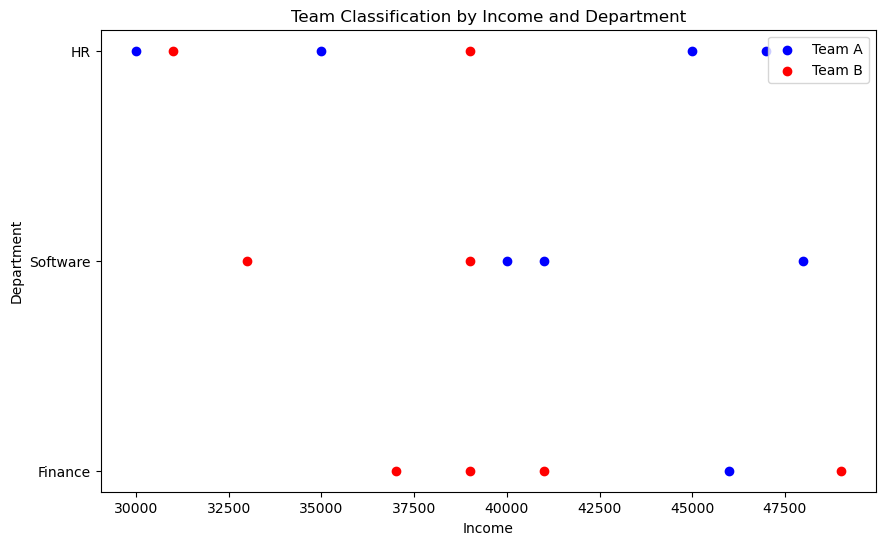

In [4]:
accuracy = (df['Team'] == df['Predicted_Team']).mean() * 100

print(f"Decision Tree Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(10, 6))
for team, color in zip(['A', 'B'], ['blue', 'red']):
    subset = df[df['Team'] == team]
    plt.scatter(subset['Income'], subset['Department'], label=f'Team {team}', c=color)

plt.title('Team Classification by Income and Department')
plt.xlabel('Income')
plt.ylabel('Department')
plt.legend()
plt.show()